Dec 9, 2021

Jason Cardinal Exercise Notebook Lighthouse Labs - Outlier Detection

[https://data.compass.lighthouselabs.ca/days/w03d3/activities/457]

this notebook contains the code along notes

Another important part of the Data Preparation is the Outlier Detection. Sometimes, we have to deal with observations that are "extreme" and can ruin our model. It is very important to identify them and do something about them before training starts.

## Outlier Detection

### What is an Outlier?

An outlier is a commonly used terminology by analysts and data scientists as it needs close attention, else it can result in wildly wrong estimations. Simply speaking, an outlier is an observation that appears far away and diverges from an overall pattern in a sample.

We have two main types of outliers: - Univariate: we are looking at one variable at a time - Multivariate: even though there are no univariate outliers, we can spot some extreme values if we look at the values of multiple variables at the same time.

There are a lot of reasons why outliers occur:

* Data Entry Errors – e.g. people make mistakes when filling in a survey.
* Measurement Errors – e.g. a device doing various measurements can be faulty.
* Experimental Errors – we can make a mistake when experimenting.
* Intentional Outliers – people can make "mistakes" intentionally, for example, in a loan application.
* Sampling Errors – e.g. we might take a sample which is too small.
* Natural Outliers – e.g. there might be a lot of snow one year and no snow the next one.

### What is the Impact of Outliers on a Dataset?

Outliers can drastically change the results of data science and machine learning projects. There are numerous impacts of outliers in a data set:

* They increase the error variance, therefore, reduces the power of statistical tests.
* They can bias or influence estimates that may be of substantive interest.
* They can also impact the basic assumption of a regression, and other statistical model assumptions.

To better understand the impact, let’s take a look at an example to see what happens to a data set with and without outliers in the data set.

[https://i.imgur.com/3lvBLoA.png]

As we can see, the data with outliers have a very different mean and standard deviation. In the first scenario, we will say that the mean is 5.45. But with the outlier, the mean soars to 30.

### How to Detect Outliers?

In this section, we are going to present the most commonly used techniques of the outlier detection, which are:

1. Statistical tests
2. Distance-based approaches
3. Density-based approaches
4. Visualization

#### Statistical Tests

In this approach, we assume that normal data objects follow a (known) distribution and occur in a high probability region of this distribution.

Outliers, on the other hand, strongly deviate from this distribution.

There a couple of rules of thumb which we can use to remove the outliers: - Any value which is beyond the range of -1.5 x IQR to 1.5 x IQR. - Any value which is out of the range of 5th and 95th percentile. - Any value which is 3 or more standard deviations away from the mean.

BUT, there are two main problems with this approach:

1. We need to fit data to one of the known distributions.
2. The mean, standard deviation, and IQR are affected by the outliers we are trying to remove.

#### Distance-based Approaches

The general idea is: Judge a point based on the distance(s) to its neighbors. We assume that normal data objects have a dense neighborhood.

Outliers, on the other hand, are far apart from their neighbors, i.e., have a less dense neighborhood.

The most popular distance-based algorithm is kNN (k nearest neighbors). It simply computes the distances between observations and compares them.

https://i.imgur.com/JJTDy0W.png

It computes the distance to the nearest neighbor of a point X and compares it with the same distance for k nearest neighbors. If the distance is significantly higher we consider the point X as an outlier.

#### Density Based Approaches

In density-based approaches, we assume that the density around normal data objects is similar to the density around its neighbors.

Outliers, on the other hand, have a considerably different density than their neighbors.

The most common density-based technique is LOF (Local Outlier Factor) and you can read more about how it works in the article Local Outlier Factor for Anomaly Detection.

Visualization

#### Visualization

We can also identify outliers visually. Depending on the type of the outliers we are looking for we can use different graph types to identify outliers.

For univariate analysis: - A boxPlot

https://i.imgur.com/tkbljxs.png

A histogram

https://i.imgur.com/Yn0BZv9.png

For multivariate analysis:

A scatterPlot

https://i.imgur.com/fXuKB8v.png

## Prediction of House Prices: Outlier Detection

We can continue in the same notebook as in the activityData Exploration.

Let's check the values of our target variable together with the other numeric attributes we identified as important in the previous tutorial: - TotalBsmtSF - GrLivArea

In [6]:
# import the correct packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the data into a Pandas DataFrame called df_train. Display the first 5 rows

In [7]:
# load the dataframe
df_train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


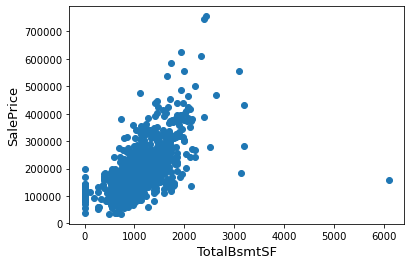

In [8]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['TotalBsmtSF'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

We can see that there is one house with a really huge basement and a cheap price. This house would cause problems in modeling because, except for this one house, we can see a clear linear relationship between the size of a basement and the price of a house.

Now we are going to remove this outlier from our dataset. We will remove all observations that have more than 5,000 square feet of basement and a price lower than $300,000:

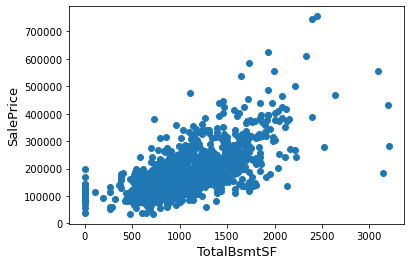

In [9]:
# delete outliers
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>5000) & (df_train['SalePrice']<300000)].index)

# reset index
df_train = df_train.reset_index(drop=True)

# check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

We can see that the relationship in the picture is much nicer now.

Let's check another numeric variable from the output of the previous tutorial: GrLivArea.

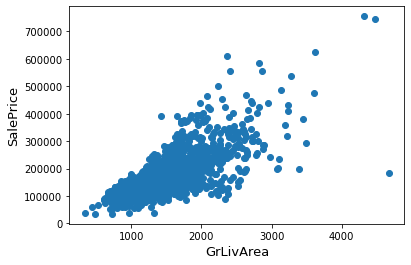

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

This is a good example of multivariate outliers. If we look only at GrLivArea there are no outliers because the largest area is quite close to the second and the third largest. However, if we take a look at SalePrice together with GrLivArea, we can see that the price of the largest house is really small, which will again cause problems in the modeling step. Therefore we should remove this observation as well:

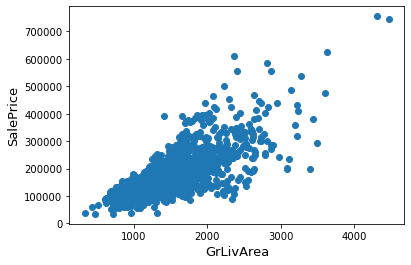

In [11]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
df_train = df_train.reset_index(drop=True)

fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

We can see that this relationship is now also nice and linear :).